4a

In [2]:
import torch
import matplotlib.pyplot as plt

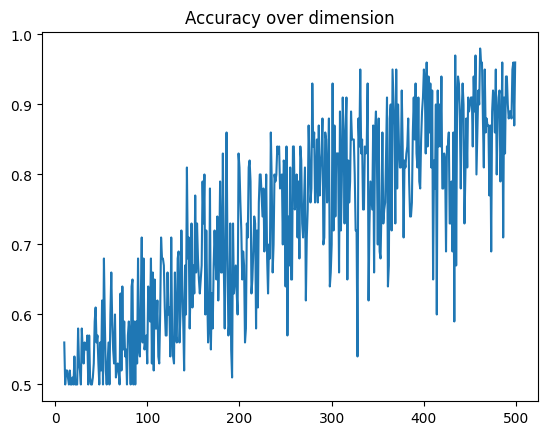

In [9]:
# dataset N(0,1)
n = 50
IN = 1
OUT = 0

def calc_t(x_data, y_data, mu_bar):
    x_thresholds = [torch.dot(x, mu_bar).item() for x in x_data]
    y_thresholds = [torch.dot(y, mu_bar).item() for y in y_data]
    x_thresholds.sort()
    y_thresholds.sort()
    threshold = x_thresholds[0]
    for t in y_thresholds[::-1]:
        if t < x_thresholds[0]:
            threshold = t
            break
    return threshold

def member_alg(z, threshold):
    if torch.dot(z, mu_bar) >= threshold: return IN
    else: return OUT

thresholds = [0] * 501
accuracy = [0] * 501

for d in range(10, 501):
    x_data = torch.randn(n,d)
    y_data = torch.randn(n,d)
    mu_bar = torch.sum(x_data, dim=0)/n

    thresholds[d] = calc_t(x_data, y_data, mu_bar)

    for x in x_data:
        if member_alg(x, thresholds[d]) == IN: accuracy[d] += 1

    for y in y_data:
        if member_alg(y, thresholds[d]) == OUT: accuracy[d] += 1
    
    accuracy[d] /= 2*n

plt.plot([d for d in range(10, 500)], accuracy[10:-1])
plt.title('Accuracy over dimension')
plt.show()




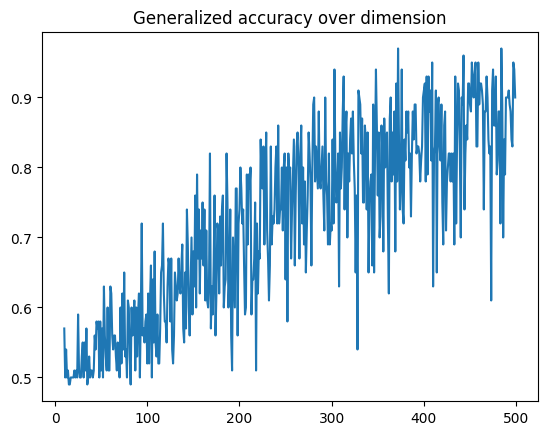

In [14]:
accuracy = [0] * 501

for d in range(10, 501):
    x_data = torch.randn(n,d)
    y_data = torch.randn(n,d)
    mu_bar = torch.sum(x_data, dim=0)/n

    for x in x_data:
        if member_alg(x, thresholds[d]) == IN: accuracy[d] += 1

    for y in y_data:
        if member_alg(y, thresholds[d]) == OUT: accuracy[d] += 1
    
    accuracy[d] /= 2*n

plt.plot([d for d in range(10, 500)], accuracy[10:-1])
plt.title('Generalized accuracy over dimension')
plt.show()

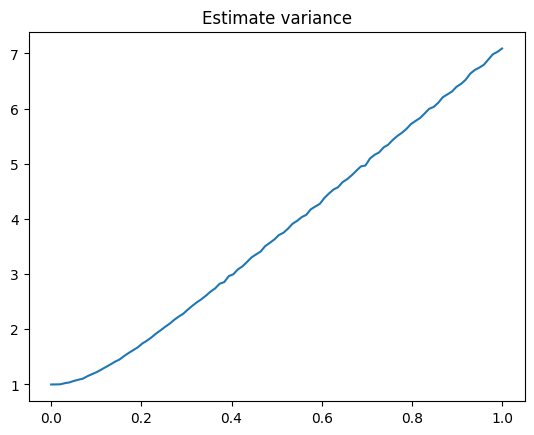

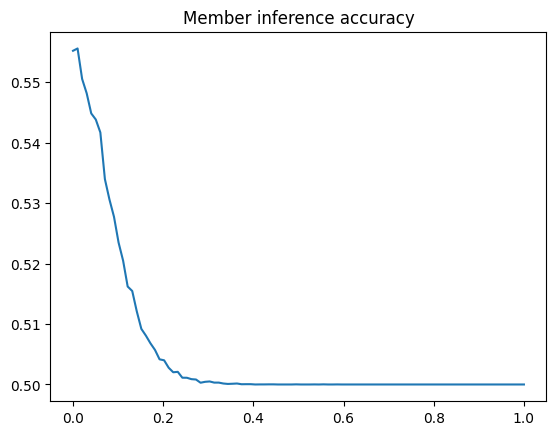

In [17]:
d = 50
MAX_T = 1000

# thresholds
points = 100
vars = torch.linspace(0, 1, points)
accuracy = [0 for var in range(points)]
mu_t_norm = [0 for var in range(points)]
for i in range(points):
    for t in range(MAX_T):
        # generate data
        x_data = torch.randn(n,d)
        y_data = torch.randn(n,d)
        mu_bar = torch.sum(x_data, dim=0)/n 

        var = vars[i]
        mu_tilde = mu_bar + var * torch.randn(d)
        mu_t_norm[i] += torch.norm(mu_tilde, p=2)
        t_u = calc_t(x_data, y_data, mu_tilde)
        t_acc = 0

        for x in x_data:
            if member_alg(x, t_u) == IN: t_acc += 1

        for y in y_data:
            if member_alg(y, t_u) == OUT: t_acc += 1
        
        t_acc /= 2*n
        accuracy[i] += t_acc
    mu_t_norm[i] /= MAX_T
    accuracy[i] /= MAX_T

plt.plot(vars, mu_t_norm)
plt.title("Estimate variance")
plt.show()

plt.plot(vars, accuracy)
plt.title("Member inference accuracy")
plt.show()